In [ ]:
#Total Bachelor's Degrees

In [41]:
import geopandas as gp
import pandas as pd
Bachelors=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/2015 Kentucky ACS Data/Bachelors Degree (adjusted).csv')

In [ ]:
#Total number of graduate degrees (master's, professional, and doctorate)

In [43]:
Graduate_Degree=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/2015 Kentucky ACS Data/Educational Attainment (adjusted).csv')

In [ ]:
#Total number of housing units

In [45]:
HHUnits=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/2015 Kentucky ACS Data/Household Units (adjusted).csv')

In [ ]:
#Total median income by household

In [47]:
Median_Income=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/2015 Kentucky ACS Data/Median Household Income (adjusted).csv')

In [ ]:
#Total population

In [28]:
Total_Pop=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/2015 Kentucky ACS Data/Total Population (adjusted).csv')

In [ ]:
#Total number of people using public transit, biking, or walking as mode of transport

In [29]:
Transport=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/2015 Kentucky ACS Data/Transportation to Work (adjusted).csv')

In [ ]:
#Population density data

In [30]:
Pop_Density=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/2015 Kentucky ACS Data/Population Density.csv')

In [ ]:
#Merging all of the above data into one table using GEOID as the merge column

In [144]:
from functools import reduce
dfs = [Total_Pop, Pop_Density, HHUnits, Bachelors, Median_Income, Graduate_Degree, Transport]
ACSData = reduce(lambda left,right: pd.merge(left,right,on='GEOID'), dfs)
ACSData.to_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/2015 Kentucky ACS Data/ACS Data Combined.csv')

In [ ]:
#Pulling in the block data for Kentucky and plotting it to make sure it looks correct

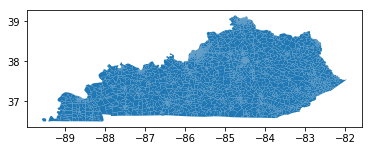

In [145]:
Blocks = gp.GeoDataFrame.from_file('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/Tiger Census Blocks/tl_2015_21_bg.shp',crs='crs')
%matplotlib inline
Blocks.plot()

In [ ]:
#Converting the GEOID column in the blocks file from an object to numerical

In [147]:
Blocks['GEOID'] = Blocks['GEOID'].convert_objects(convert_numeric=True)
Blocks.GEOID.dtype

C:\Users\dmfr224\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


dtype('int64')

In [ ]:
#Merging the block data with the ACS data

In [161]:
BlockswACSData = pd.merge(Blocks, ACSData, how = 'left', left_on = 'GEOID', right_on = 'GEOID')

In [ ]:
#Converting the above to a geodataframe

In [162]:
ACSBlocks=gp.GeoDataFrame(BlockswACSData)

In [ ]:
#Saving the above as a .shp file

In [163]:
ACSBlocks.to_file('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/Tiger Census Blocks/Blocks with ACS Data/BlockswACS.shp',driver='ESRI Shapefile')

In [ ]:
#Pulling in the data for the latitude and longitude points (2541 points)

In [164]:
import geopandas as gp
dfLL=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/Lat_Long.csv')

In [ ]:
#Converting points to geographic values

In [165]:
def LatLon_to_point(df):   
    dfLL['geometry'] = dfLL.apply(lambda x: Point((float(x.LONG), float(x.LAT))), axis=1)
    points = gp.GeoDataFrame(df, geometry='geometry', crs = {'init':'epsg:4326'})
    return points

In [ ]:
#Converting points into a .shp file

In [166]:
import geopandas as gp
from shapely.geometry import Point
dfLL['geometry'] = dfLL.apply(lambda x: Point((float(x.Lat), float(x.Long))), axis=1)
points = gp.GeoDataFrame(dfLL, geometry='geometry', crs = {'init':'epsg:4326'})

In [ ]:
#Pulling in the LEHD data

In [167]:
dfLEHD=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/KY_LEHD_Estimation_File.csv')

In [ ]:
#Seeing what column headings are in the LEHD data

In [168]:
dfLEHD.columns

Index(['No', 'EDHLTH_WAC_SCALED', 'EMP_RAC_SCALED', 'LEISER_WAC_SCALED', 'RETAIL_WAC_SCALED'], dtype='object')

In [ ]:
#Seeing what column headings are in the point data

In [169]:
points.columns

Index(['No', 'Lat', 'Long', 'geometry'], dtype='object')

In [ ]:
#Merging the LEHD data and the points

In [170]:
pointswLEHD = pd.merge(points,dfLEHD, how = 'left', left_on = 'No', right_on = 'No')

In [ ]:
#Merging the Blocks with ACS data with the LEHD and points data and plotting to make sure it looks correct

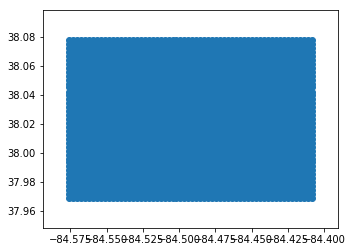

In [171]:
Blocks2 = gp.GeoDataFrame.from_file('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/Tiger Census Blocks/Blocks with ACS Data/BlockswACS.shp',crs='crs')
Blocks_with_ACS_and_LEHD = gp.sjoin(pointswLEHD,Blocks2,how = 'inner',op = 'within')
Blocks_with_ACS_and_LEHD.plot()

In [ ]:
#Forcing jupyter to show a larger amount in the below table (more columns)

In [172]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#Looking at the data to make sure everything merged correctly

In [173]:
Blocks_with_ACS_and_LEHD

,No,Lat,Long,geometry,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,LEISER_WAC_SCALED,RETAIL_WAC_SCALED,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Population,Pop per Ar,HH_Units,Bachelor's,Median Inc,All Degree,Public Tra
0,0,-84.4086,37.9688,POINT (-84.40860000000001 37.9688),0.000000,21.366651,25.309109,12.271083,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
1,1,-84.4086,37.9715,POINT (-84.40860000000001 37.9715),0.495913,149.372150,20.136110,5.194553,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
41,41,-84.4113,37.9688,POINT (-84.4113 37.9688),0.000000,14.162458,25.211479,12.223748,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
42,42,-84.4113,37.9715,POINT (-84.4113 37.9715),0.061388,31.454273,12.123171,5.312387,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
43,43,-84.4113,37.9742,POINT (-84.4113 37.9742),1.003799,275.731702,19.072187,0.000000,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
82,82,-84.4141,37.9688,POINT (-84.4141 37.9688),0.000000,13.908776,26.883480,13.034414,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
83,83,-84.4141,37.9715,POINT (-84.4141 37.9715),0.000000,12.552582,12.838035,6.224502,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
84,84,-84.4141,37.9742,POINT (-84.4141 37.9742),0.321028,91.091594,6.933740,0.404461,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
123,123,-84.4168,37.9688,POINT (-84.41679999999999 37.9688),0.000000,14.164117,29.324149,14.217769,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0
124,124,-84.4168,37.9715,POINT (-84.41679999999999 37.9715),0.000000,14.549447,16.391473,7.947381,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0


In [ ]:
#Converting to geodataframe

In [174]:
Blocks_ACS_LEHD=gp.GeoDataFrame(Blocks_with_ACS_and_LEHD)

In [ ]:
#Converting to .shp file

In [175]:
Blocks_ACS_LEHD.to_file('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/Tiger Census Blocks/Blocks with ACS Data/Blocks_ACS_LEHD.shp',driver='ESRI Shapefile')

In [ ]:
#Saving to an excel file to work with the model

In [176]:
df4 = Blocks_with_ACS_and_LEHD
df4.to_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/Model/Blocks with ACS and LEHD.csv')

In [ ]:
#Pulling in the data from having the model ran on all data applied to the points

In [185]:
ModelOutput=pd.read_csv('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/Model/Model Outputs.csv')

In [ ]:
#One last merge

In [186]:
Blocks_with_ACS_and_LEHD_and_Modeled = pd.merge(Blocks_with_ACS_and_LEHD,ModelOutput, how ='left', left_on='No', right_on = 'No')
Blocks_with_ACS_and_LEHD_and_Modeled

,No,Lat,Long,geometry,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,LEISER_WAC_SCALED,RETAIL_WAC_SCALED,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Population,Pop per Ar,HH_Units,Bachelor's,Median Inc,All Degree,Public Tra,Model Outputs
0,0,-84.4086,37.9688,POINT (-84.40860000000001 37.9688),0.000000,21.366651,25.309109,12.271083,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,43.139532
1,1,-84.4086,37.9715,POINT (-84.40860000000001 37.9715),0.495913,149.372150,20.136110,5.194553,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,42.914346
2,41,-84.4113,37.9688,POINT (-84.4113 37.9688),0.000000,14.162458,25.211479,12.223748,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,43.150479
3,42,-84.4113,37.9715,POINT (-84.4113 37.9715),0.061388,31.454273,12.123171,5.312387,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,43.091129
4,43,-84.4113,37.9742,POINT (-84.4113 37.9742),1.003799,275.731702,19.072187,0.000000,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,42.702013
5,82,-84.4141,37.9688,POINT (-84.4141 37.9688),0.000000,13.908776,26.883480,13.034414,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,43.154794
6,83,-84.4141,37.9715,POINT (-84.4141 37.9715),0.000000,12.552582,12.838035,6.224502,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,43.123967
7,84,-84.4141,37.9742,POINT (-84.4141 37.9742),0.321028,91.091594,6.933740,0.404461,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,42.978828
8,123,-84.4168,37.9688,POINT (-84.41679999999999 37.9688),0.000000,14.164117,29.324149,14.217769,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,43.160122
9,124,-84.4168,37.9715,POINT (-84.41679999999999 37.9715),0.000000,14.549447,16.391473,7.947381,1382,21,067,004007,2,2147483647,Block Group 2,G5030,S,59496458,468116,+37.9435777,-084.4230152,1036.0,0.000017,435.0,303.0,65714,154.0,49.0,43.129199


In [ ]:
#Converting to geodataframe

In [187]:
Blocks_ACS_LEHD_Modeled=gp.GeoDataFrame(Blocks_with_ACS_and_LEHD_and_Modeled)

In [ ]:
#Converting to .shp file, which is the shp file that the heat map was made from

In [188]:
Blocks_ACS_LEHD_Modeled.to_file('C:/Users/dmfr224/Desktop/CE 599/Final Project/1000 foot spacing (5.28)/2015 ACS 5 Year Estimates for Kentucky/Tiger Census Blocks/Blocks with ACS Data/Blocks_ACS_LEHD_Modeled.shp',driver='ESRI Shapefile')